In [2]:
# Importing Modules

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [3]:
# Importing Dataset

X, y = make_moons(
    n_samples = 500,
    noise = 0.5,
    random_state = 42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

> ## Sigmoid Activation Function
> 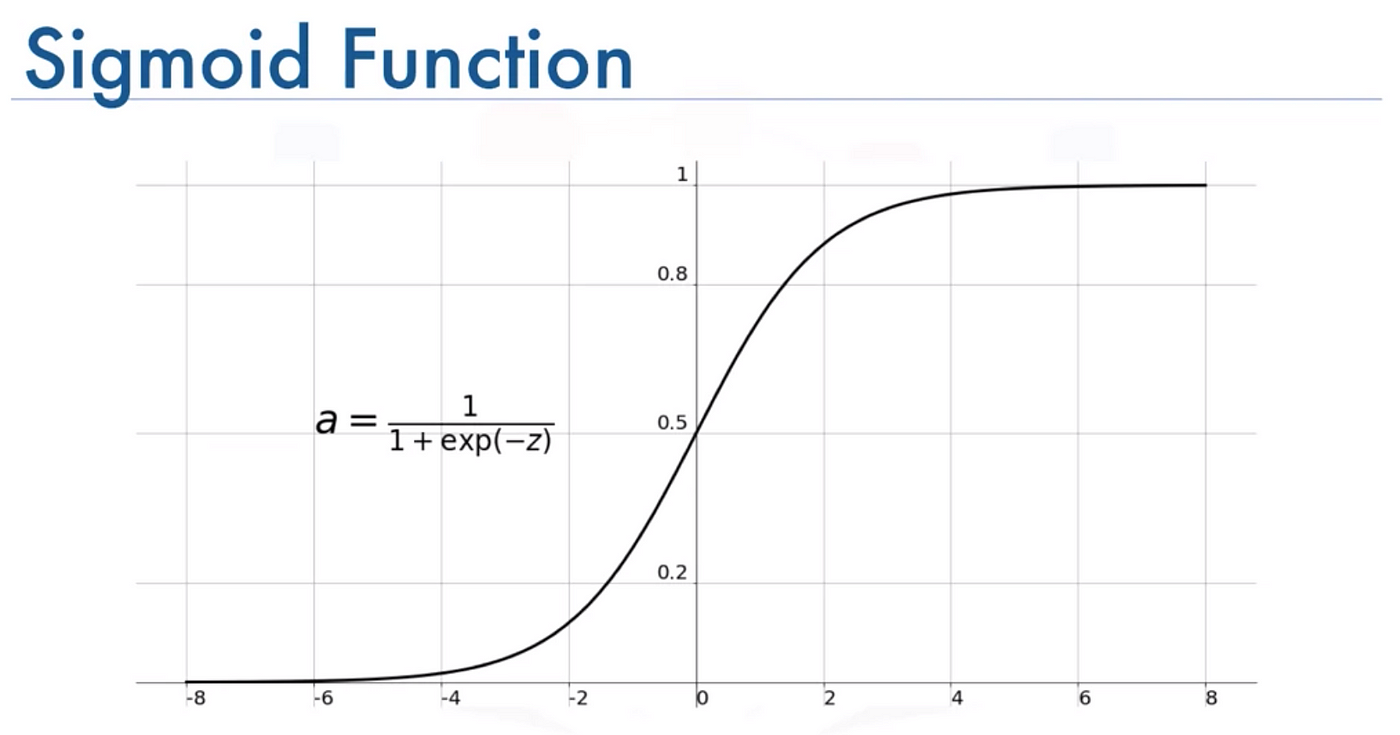
<br><br>
> 1. **Continuous and Differentiable**: The sigmoid function is smooth and differentiable, which makes it suitable for gradient-based optimization methods.<br><br>
> 2. **Non-linear**: It introduces non-linearity into the model, allowing it to learn complex patterns.

In [4]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 10, activation = 'sigmoid'))
model.add(Dense(units = 5, activation = 'sigmoid'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [6]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4985 - loss: 0.8588 - val_accuracy: 0.4125 - val_loss: 0.9419
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4885 - loss: 0.8500 - val_accuracy: 0.4125 - val_loss: 0.9180
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5069 - loss: 0.8159 - val_accuracy: 0.4125 - val_loss: 0.8958
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5036 - loss: 0.8039 - val_accuracy: 0.4125 - val_loss: 0.8750
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5071 - loss: 0.7849 - val_accuracy: 0.4125 - val_loss: 0.8560
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4592 - loss: 0.8123 - val_accuracy: 0.4125 - val_loss: 0.8378
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5033 - loss: 0.7653 - val_accuracy: 0.4125 - val_loss: 0.8223
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5020 - loss: 0.7555 - val_accuracy: 0.4125 - val_loss

> ### Why you shoud not use Sigmoid Activation Function:
> 1. **Vanishing Gradient Problem**: Gradients can become very small during backpropagation, leading to slow learning or even stopping the learning process.
> 2. **Cannot Work with Negative Values**: The output range is between 0 and 1, which means it cannot handle negative input values effectively.
> 3. **Not Zero-Centered**: The outputs are always positive, which can lead to inefficient gradient updates.
> 4. **Derivative Calculation is Expensive**: The computation of the derivative is more complex compared to other activation functions, which can slow down the training process.
> 5. **Saturated**: When the input values are very large or very small, the function saturates and the gradients become almost zero, leading to slow learning.

---

> ## Tanh Activation Function
> 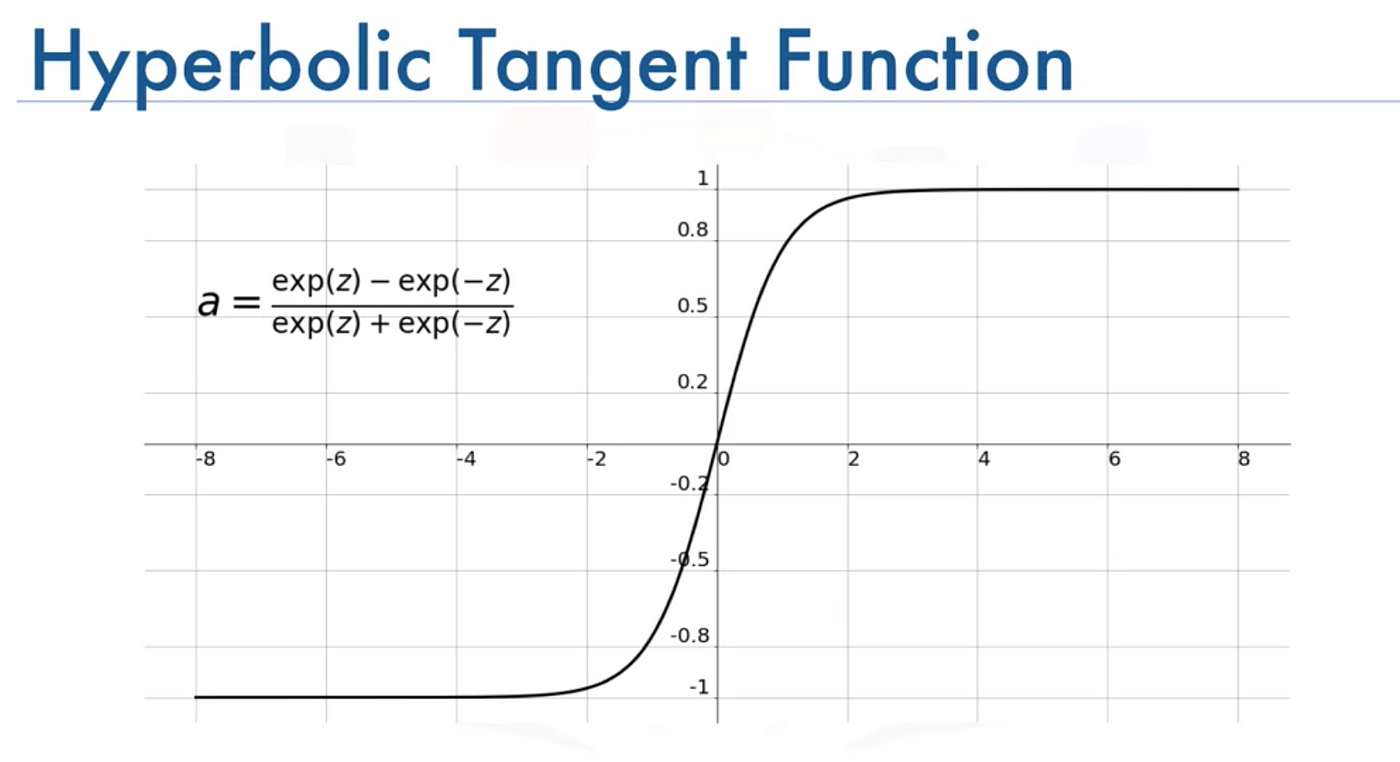
<br><br>
> 1. **Non-linear**: The tanh function introduces non-linearity into the model, allowing it to learn complex patterns.
> 2. **Differentiable and Continuous**: It is smooth and differentiable, making it suitable for gradient-based optimization methods.
> 3. **Zero-Centered**: The outputs range from -1 to 1, which helps in centering the data and making the optimization process more efficient.

In [7]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 10, activation = 'tanh'))
model.add(Dense(units = 5, activation = 'tanh'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [9]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4335 - loss: 0.7632 - val_accuracy: 0.3625 - val_loss: 0.7636
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4255 - loss: 0.7473 - val_accuracy: 0.4000 - val_loss: 0.7320
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4480 - loss: 0.7197 - val_accuracy: 0.4625 - val_loss: 0.7036
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5119 - loss: 0.6929 - val_accuracy: 0.5500 - val_loss: 0.6775
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5587 - loss: 0.6766 - val_accuracy: 0.6500 - val_loss: 0.6528
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5855 - loss: 0.6545 - val_accuracy: 0.6875 - val_loss: 0.6303
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6903 - loss: 0.6356 - val_accuracy: 0.7625 - val_loss: 0.6099
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7608 - loss: 0.6019 - val_accuracy: 0.8000 - val_loss

> ### Why you shoud not use Tanh Activation Function:
> 1. **Vanishing Gradient Problem**: Similar to the sigmoid function, gradients can become very small during backpropagation, leading to slow learning or even stopping the learning process.
> 2. **Saturation**: When the input values are very large or very small, the function saturates and the gradients become almost zero, leading to slow learning.
> 3. **Expensive Calculation of Differentiation**: The computation of the derivative is more complex compared to other activation functions, which can slow down the training process.

---

> ## Relu Activation Function
> 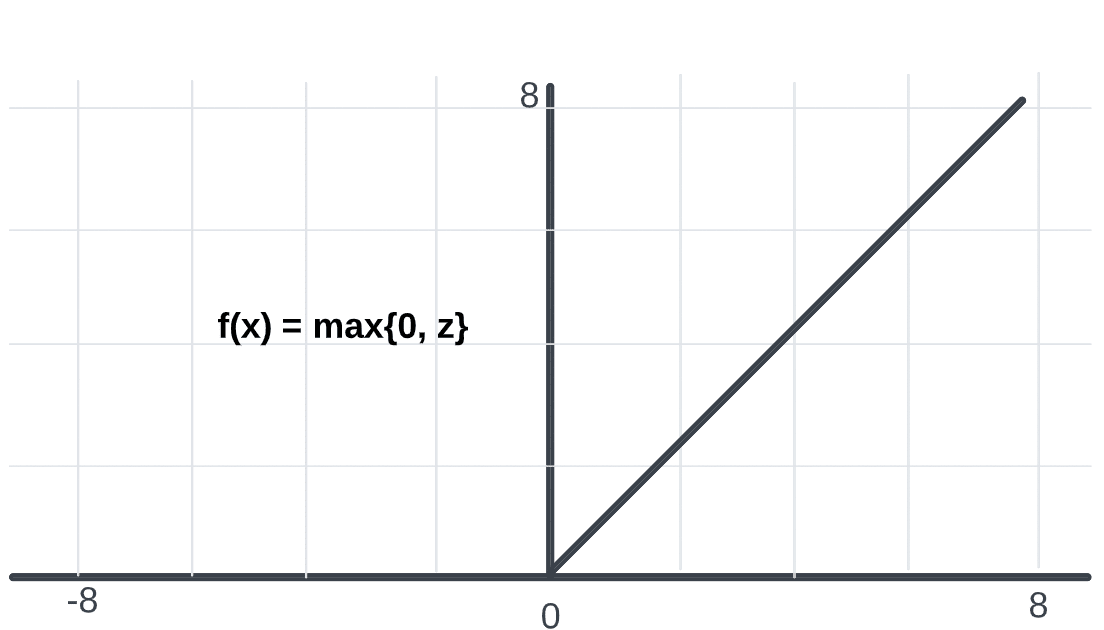
<br><br>
> 1. **Non-linear**: ReLU introduces non-linearity, allowing the network to learn complex patterns by combining multiple ReLU activations.
> 2. **Less Expensive for Gradient Calculation**: The gradient calculation is computationally efficient, which speeds up the training process.
> 3. **No Vanishing Gradient Problem**: ReLU helps in mitigating the vanishing gradient problem, making it suitable for deep networks.
> 4. **No Saturation**: Unlike sigmoid and tanh, ReLU does not saturate, which helps in maintaining strong gradients.
> 5. **Zero-Centered**: The output is zero-centered, which helps in faster convergence during training.

In [23]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 5, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [25]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3932 - loss: 0.7910 - val_accuracy: 0.3250 - val_loss: 0.7710
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4367 - loss: 0.7627 - val_accuracy: 0.3625 - val_loss: 0.7557
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4137 - loss: 0.7541 - val_accuracy: 0.3625 - val_loss: 0.7415
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4670 - loss: 0.7154 - val_accuracy: 0.4000 - val_loss: 0.7279
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4543 - loss: 0.7120 - val_accuracy: 0.3750 - val_loss: 0.7153
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4698 - loss: 0.6991 - val_accuracy: 0.3875 - val_loss: 0.7027
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5175 - loss: 0.6795 - val_accuracy: 0.3750 - val_loss: 0.6910
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4720 - loss: 0.6855 - val_accuracy: 0.4125 - val_loss

> ### Why you should not use Venila ReLU Activation Function:
> **Dying ReLU Problem**: In some cases, you may find that half of
 your network’s neurons are dead, especially if you used a large learning rate. A neuron dies when its weights get tweaked in such a way that the weighted sum of its inputs are negative for all instances in the training set. When this happens, it just keeps outputting 0s, and gradient descent does not affect it anymore since the gradient of the ReLU function is 0 when its input is negative.

---

> ## Leaky Relu Activation Function
> 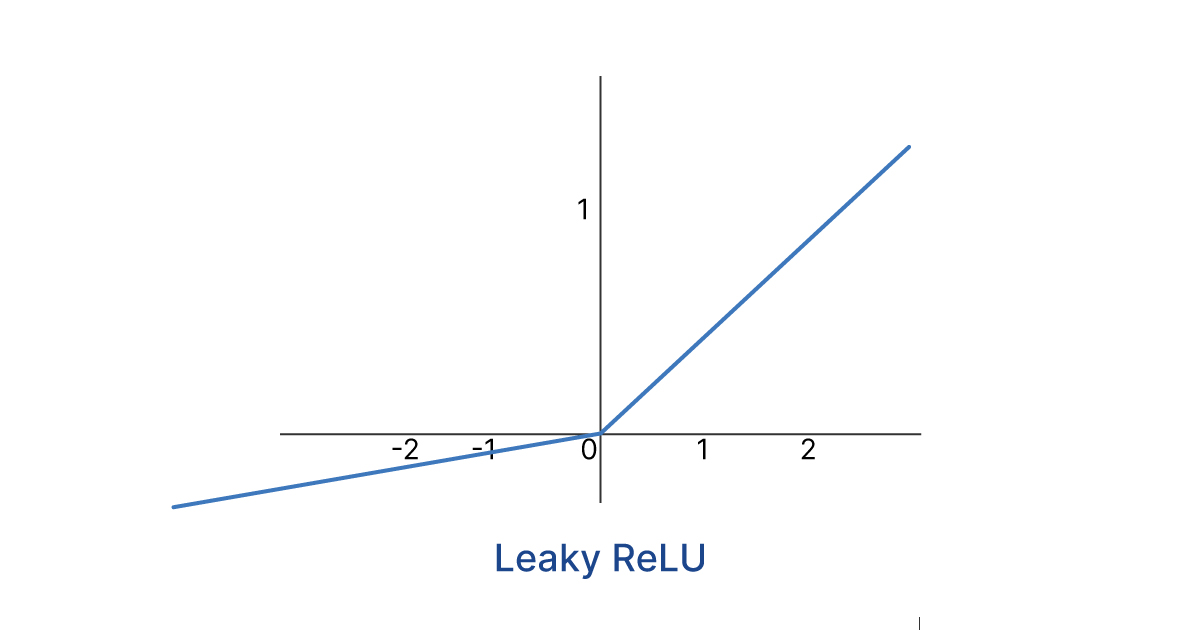

In [ ]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 10, activation = keras.layers.LeakyReLU(negative_slope=0.2), kernel_initializer = 'he_normal'))
model.add(Dense(units = 5, activation = keras.layers.LeakyReLU(negative_slope=0.2), kernel_initializer = 'he_normal'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [28]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2796 - loss: 1.3861 - val_accuracy: 0.1875 - val_loss: 1.2886
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2896 - loss: 1.3348 - val_accuracy: 0.1875 - val_loss: 1.2092
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3084 - loss: 1.2228 - val_accuracy: 0.2250 - val_loss: 1.1371
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3247 - loss: 1.3017 - val_accuracy: 0.4750 - val_loss: 1.0690
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4155 - loss: 1.1330 - val_accuracy: 0.4875 - val_loss: 1.0088
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4437 - loss: 1.1087 - val_accuracy: 0.5000 - val_loss: 0.9538
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4544 - loss: 1.0602 - val_accuracy: 0.5375 - val_loss: 0.9038
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5194 - loss: 0.9583 - val_accuracy: 0.5625 - val_loss

>  leaky variants always outperformed the strict ReLU activation function. In fact, setting α = 0.2 (huge leak) seemed to result in better performance than α = 0.01 (small leak)

---

> ## Parametric ReLU Activation Function
> α is authorized to be learned during training (instead of being a hyperparameter, it becomes a parameter that can be modified by backpropagation like any other parameter). This was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set

In [31]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 10, activation = keras.layers.PReLU(), kernel_initializer = 'he_normal'))
model.add(Dense(units = 5, activation = keras.layers.PReLU(), kernel_initializer = 'he_normal'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [33]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5280 - loss: 0.8161 - val_accuracy: 0.5875 - val_loss: 0.7693
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5013 - loss: 0.7995 - val_accuracy: 0.5875 - val_loss: 0.7474
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5278 - loss: 0.7503 - val_accuracy: 0.5875 - val_loss: 0.7281
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5149 - loss: 0.7337 - val_accuracy: 0.5875 - val_loss: 0.7113
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4884 - loss: 0.7465 - val_accuracy: 0.6250 - val_loss: 0.6966
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5513 - loss: 0.7126 - val_accuracy: 0.6625 - val_loss: 0.6840
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5371 - loss: 0.6939 - val_accuracy: 0.7000 - val_loss: 0.6729
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5729 - loss: 0.6833 - val_accuracy: 0.7000 - val_

> This relu variant was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set.

---

> ## ELU (Exponential Leaky ReLU) Activation Function
> 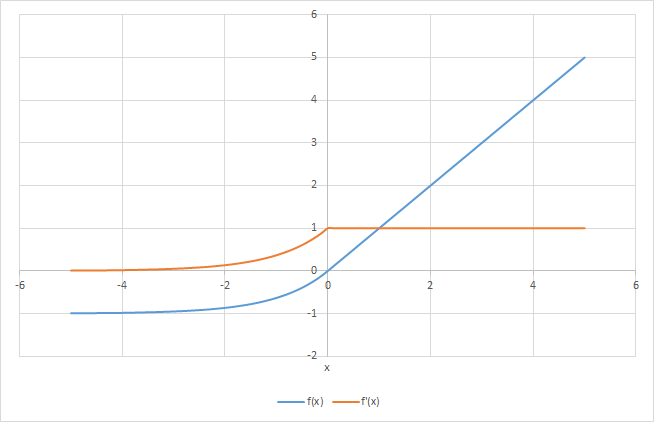

In [35]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 10, activation = keras.layers.ELU(), kernel_initializer = 'he_normal'))
model.add(Dense(units = 5, activation = keras.layers.ELU(), kernel_initializer = 'he_normal'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [37]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6177 - loss: 0.6080 - val_accuracy: 0.7375 - val_loss: 0.5017
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6392 - loss: 0.6193 - val_accuracy: 0.7625 - val_loss: 0.4786
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7348 - loss: 0.5479 - val_accuracy: 0.8000 - val_loss: 0.4592
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7527 - loss: 0.5400 - val_accuracy: 0.8375 - val_loss: 0.4441
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7438 - loss: 0.5213 - val_accuracy: 0.8375 - val_loss: 0.4325
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7687 - loss: 0.5197 - val_accuracy: 0.8125 - val_loss: 0.4238
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.5062 - val_accuracy: 0.8125 - val_loss: 0.4175
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7988 - loss: 0.4591 - val_accuracy: 0.8250 - val_loss

>- The hyperparameter α defines the value that the ELU func
tion approaches when z is a large negative number. It is usually set to but you can tweak it like any other hyperparameter if you want.
>- It has a nonzero gradient for z < 0, which avoids the dead neurons problem.
>- If α is equal to 1 then the function is smooth everywhere, including
 around z = 0, which helps speed up Gradient Descent, since it does not bounce as much left and right of z = 0.
>
> The main drawback of the ELU activation function is that it is slower to compute than the ReLU and its variants (due to the use of the exponential function), but during training this is compensated by the faster convergence rate. However, at test time an ELU network will be slower than a ReLU network.


 ---

> ## SELU (Scaled Exponent Linear Unit) Acivation Function
>- The input features must be standardized (mean 0 and standard deviation 1).
>- Every hidden layer’s weights must also be initialized using LeCun normal initialization. In Keras, this means setting kernel_initializer="lecun_normal".
>- The network’s architecture must be sequential. Unfortunately, if you try to use SELU in non-sequential architectures, such as recurrent networks or networks with skip connections (i.e., connections that skip layers, such as in wide & deep nets), self-normalization will not be guaranteed, so SELU will not neces
sarily outperform other activation functions.
> - It only guarantees self-normalization if all layers are dense. However, in practice the SELU activation function seems to work great with convolutional neural nets as well

In [38]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 10, activation = 'selu', kernel_initializer = 'lecun_normal'))
model.add(Dense(units = 5, activation = 'selu', kernel_initializer = 'lecun_normal'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [40]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7769 - loss: 0.4625 - val_accuracy: 0.8375 - val_loss: 0.4031
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7187 - loss: 0.5044 - val_accuracy: 0.8500 - val_loss: 0.3937
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8159 - loss: 0.4195 - val_accuracy: 0.8625 - val_loss: 0.3895
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8246 - loss: 0.4294 - val_accuracy: 0.8625 - val_loss: 0.3885
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8165 - loss: 0.4294 - val_accuracy: 0.8625 - val_loss: 0.3886
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8302 - loss: 0.4035 - val_accuracy: 0.8500 - val_loss: 0.3883
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8298 - loss: 0.4186 - val_accuracy: 0.8500 - val_loss: 0.3880
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8063 - loss: 0.4585 - val_accuracy: 0.8500 - val_los

---

> - If you want to train your DNN faster - `Leaky ReLU`
> - If you dont know the exact alpha value - `PReLU`
> - If your data is self Normalizing - `ELU`
> - If your data is not self normalizing - `SELU`